<a href="https://colab.research.google.com/github/snowgecko/datathon_team_04/blob/main/ExportData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Imports all the packages.
import numpy as np
import pandas as pd
import os
import pdb
import array

from IPython.core.display import display, HTML
import scipy.stats as stats
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import auth
from google.cloud import bigquery
from google.colab import files

%load_ext google.colab.data_table
from google.colab.data_table import DataTable

# get the amsterdamumcdb package from PyPI repository for use in Colab
!pip install amsterdamumcdb
import amsterdamumcdb as adb

!pip install scikit-learn

from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression

###################SET PROJECT DEFAULTS##################
PROJECT_ID = "dynamic-reef-423509-d1" #@param {type:"string"}

# sets default dataset for AmsterdamUMCdb
DATASET_PROJECT_ID = 'amsterdamumcdb' #@param {type:"string"}
DATASET_ID = 'version1_5_0' #@param {type:"string"}
LOCATION = 'eu' #@param {type:"string"}

# all libraries check this environment variable, so set it:
os.environ["GOOGLE_CLOUD_PROJECT"] = "dynamic-reef-423509-d1"

auth.authenticate_user()
print('Authenticated')

config_gbq = {'query':
          {'defaultDataset': {
              "datasetId": DATASET_ID,
              "projectId": DATASET_PROJECT_ID
              },
           'Location': LOCATION}
           }

# change default limits:
DataTable.max_columns = 50
DataTable.max_rows = 30000

# sets the default query job configuration
def_config = bigquery.job.QueryJobConfig(default_dataset="amsterdamumcdb" + "." + "version1_5_0")
# sets default client settings by re-using the previously defined config
client = bigquery.Client(project=PROJECT_ID, location=LOCATION, default_query_job_config=def_config)



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.6/528.6 kB 6.5 MB/s eta 0:00:00
Authenticated


In [3]:
#get Dictionary
dictionary = adb.get_dictionary()
dictionary = dictionary.convert_dtypes()
dictionary


concept_id                     concept_name    domain_id  \
0            8532                           FEMALE       Gender   
1            8507                             MALE       Gender   
2          581476                       Home Visit        Visit   
3          581383  Inpatient Cardiac Care Facility        Visit   
4            8870        Emergency Room - Hospital        Visit   
...           ...                              ...          ...   
10620    37079369              Supplemental result   Meas Value   
10621    36210399                    Not specified   Meas Value   
10622     4302933           Pleural fluid specimen     Specimen   
10623    45879739               No sample received   Meas Value   
10624     4104934        Incorrect sample received  Observation   

       concept_class_id         vocabulary_id concept_code  \
0                Gender                Gender            F   
1                Gender                Gender            M   
2                 Visit                 Visit  OMOP4822459   
3                 Visit  CMS Place of Service  OMOP4822038   
4                 Visit  CMS Place of Service           23   
...                 ...                   ...          ...   
10620            Answer                 LOINC    LA29938-0   
10621            Answer                 LOINC    LA27211-4   
10622          Specimen                SNOMED    418564007   
10623            Answer                 LOINC    LA12433-1   
10624  Clinical Finding                SNOMED    281267002   

       source_vocabulary_id                                source_code  \
0               AUMC Gender                                      Vrouw   
1               AUMC Gender                                        Man   
2               AUMC Origin                                       Huis   
3               AUMC Origin                   CCU/IC zelfde ziekenhuis   
4               AUMC Origin     Eerste Hulp afdeling zelfde ziekenhuis   
...                     ...                                        ...   
10620  AUMC Specimen Source                              11646-ZIE-OPM   
10621  AUMC Specimen Source                                    11646-0   
10622  AUMC Specimen Source                    11646-Vocht thoraxdrain   
10623  AUMC Specimen Source         11646-Niet afgenomen door afd/arts   
10624  AUMC Specimen Source  11646-Afname verkeerde buis door afd/arts   

                      source_code_description  source_frequency  \
0                                       Vrouw              7875   
1                                         Man             14735   
2                                        Huis                85   
3                    CCU/IC zelfde ziekenhuis               296   
4      Eerste Hulp afdeling zelfde ziekenhuis              2661   
...                                       ...               ...   
10620                                 ZIE-OPM               812   
10621                                       0                 1   
10622                       Vocht thoraxdrain                 1   
10623            Niet afgenomen door afd/arts                99   
10624     Afname verkeerde buis door afd/arts                 2   

       source_frequency_validated mapping_status equivalence  
0                            7875       APPROVED       EQUAL  
1                           14735       APPROVED       EQUAL  
2                              85       APPROVED       EQUAL  
3                             296       APPROVED       EQUAL  
4                            2661       APPROVED       EQUAL  
...                           ...            ...         ...  
10620                         812       APPROVED  EQUIVALENT  
10621                           1       APPROVED  EQUIVALENT  
10622                           1       APPROVED       EQUAL  
10623                          99       APPROVED  EQUIVALENT  
10624                           2       APPROVED  EQUIVALENT  

[10625

In [4]:
from google.colab import drive
drive.mount('/content/drive')
#need to select all otherwise it errors out.

# path to base folder (right click on the directory: Datathon, and select 'Add to my Drive' in order to appear on My Drive)
drive_folder = '/content/drive/My Drive/Datathon/'


Mounted at /content/drive


In [5]:
#Shared functions
# Read data from BigQuery into pandas dataframes.
def run_query(query):
  return pd.io.gbq.read_gbq(
      query,
      project_id=DATASET_PROJECT_ID,
      dialect='standard')


In [7]:
dictionary = adb.get_dictionary()
dictionary = dictionary.convert_dtypes()
dictionary

concept_id                     concept_name    domain_id  \
0            8532                           FEMALE       Gender   
1            8507                             MALE       Gender   
2          581476                       Home Visit        Visit   
3          581383  Inpatient Cardiac Care Facility        Visit   
4            8870        Emergency Room - Hospital        Visit   
...           ...                              ...          ...   
10620    37079369              Supplemental result   Meas Value   
10621    36210399                    Not specified   Meas Value   
10622     4302933           Pleural fluid specimen     Specimen   
10623    45879739               No sample received   Meas Value   
10624     4104934        Incorrect sample received  Observation   

       concept_class_id         vocabulary_id concept_code  \
0                Gender                Gender            F   
1                Gender                Gender            M   
2                 Visit                 Visit  OMOP4822459   
3                 Visit  CMS Place of Service  OMOP4822038   
4                 Visit  CMS Place of Service           23   
...                 ...                   ...          ...   
10620            Answer                 LOINC    LA29938-0   
10621            Answer                 LOINC    LA27211-4   
10622          Specimen                SNOMED    418564007   
10623            Answer                 LOINC    LA12433-1   
10624  Clinical Finding                SNOMED    281267002   

       source_vocabulary_id                                source_code  \
0               AUMC Gender                                      Vrouw   
1               AUMC Gender                                        Man   
2               AUMC Origin                                       Huis   
3               AUMC Origin                   CCU/IC zelfde ziekenhuis   
4               AUMC Origin     Eerste Hulp afdeling zelfde ziekenhuis   
...                     ...                                        ...   
10620  AUMC Specimen Source                              11646-ZIE-OPM   
10621  AUMC Specimen Source                                    11646-0   
10622  AUMC Specimen Source                    11646-Vocht thoraxdrain   
10623  AUMC Specimen Source         11646-Niet afgenomen door afd/arts   
10624  AUMC Specimen Source  11646-Afname verkeerde buis door afd/arts   

                      source_code_description  source_frequency  \
0                                       Vrouw              7875   
1                                         Man             14735   
2                                        Huis                85   
3                    CCU/IC zelfde ziekenhuis               296   
4      Eerste Hulp afdeling zelfde ziekenhuis              2661   
...                                       ...               ...   
10620                                 ZIE-OPM               812   
10621                                       0                 1   
10622                       Vocht thoraxdrain                 1   
10623            Niet afgenomen door afd/arts                99   
10624     Afname verkeerde buis door afd/arts                 2   

       source_frequency_validated mapping_status equivalence  
0                            7875       APPROVED       EQUAL  
1                           14735       APPROVED       EQUAL  
2                              85       APPROVED       EQUAL  
3                             296       APPROVED       EQUAL  
4                            2661       APPROVED       EQUAL  
...                           ...            ...         ...  
10620                         812       APPROVED  EQUIVALENT  
10621                           1       APPROVED  EQUIVALENT  
10622                           1       APPROVED       EQUAL  
10623                          99       APPROVED  EQUIVALENT  
10624                           2       APPROVED  EQUIVALENT  

[10625

In [ ]:
#####change the code below to bring back all ventilated occurrences...
cO2PP = pd.read_gbq(
    '''
    SELECT
      person_id,
      visit_occurrence_id,
      measurement_concept_id,
      measurement_datetime,
      measurement_type_concept_id,
      value_as_number,
      unit_concept_id,
      provider_id
    FROM measurement
    WHERE
      NOT provider_id IS NULL -- ignore unvalidated device data
      AND measurement_concept_id IN (
        3035357 --Carbon dioxide [Partial pressure] in Exhaled gas
    )
    AND visit_occurrence_id = 11572
    LIMIT 2000
    '''
    , configuration=config_gbq, use_bqstorage_api=True)

print(f'Number of Partial pressure of CO2 values: {len(cO2PP)}')

cO2PP

In [6]:
##########new section of code using .csv ##################
df = pd.read_csv(drive_folder + "ventilated.csv") # read the dataset to df_data
df_ventilated = df.sort_values(by=['visit_occurrence_id'])

#df.head(10) - unsorted.
df_ventilated.head(10)
#df_ventilated.count()
#33s to load


measurement_id  person_id  measurement_concept_id measurement_date  \
47040        12258419          0                 3004921       2006-01-01   
72565        12258451          0                 3004921       2006-01-01   
65192        12258436          0                 3004921       2006-01-01   
41487        12258411          0                 3004921       2006-01-01   
32336        12258384          0                 3004921       2006-01-01   
52203        12258421          0                 3004921       2006-01-01   
75917        12258453          0                 3004921       2006-01-01   
79061        12258455          0                 3004921       2006-01-01   
69012        12258445          0                 3004921       2006-01-01   
61289        12258429          0                 3004921       2006-01-01   

            measurement_datetime measurement_time  \
47040  2006-01-01 08:12:00+00:00         08:12:00   
72565  2006-01-01 14:12:00+00:00         14:12:00   
65192  2006-01-01 12:12:00+00:00         12:12:00   
41487  2006-01-01 07:12:00+00:00         07:12:00   
32336  2006-01-01 05:42:00+00:00         05:42:00   
52203  2006-01-01 09:12:00+00:00         09:12:00   
75917  2006-01-01 15:12:00+00:00         15:12:00   
79061  2006-01-01 16:12:00+00:00         16:12:00   
69012  2006-01-01 13:12:00+00:00         13:12:00   
61289  2006-01-01 11:12:00+00:00         11:12:00   

       measurement_type_concept_id  operator_concept_id  value_as_number  \
47040                        32817                  NaN              NaN   
72565                        32817                  NaN              NaN   
65192                        32817                  NaN              NaN   
41487                        32817                  NaN              NaN   
32336                        32817                  NaN              NaN   
52203                        32817                  NaN              NaN   
75917                        32817                  NaN              NaN   
79061                        32817                  NaN              NaN   
69012                        32817                  NaN              NaN   
61289                        32817                  NaN              NaN   

       value_as_concept_id  ...  provider_id  visit_occurrence_id  \
47040           36308445.0  ...           40                    0   
72565           45880365.0  ...           40                    0   
65192           36308445.0  ...           40                    0   
41487           36308445.0  ...           40                    0   
32336           36308445.0  ...           40                    0   
52203           36308445.0  ...           40                    0   
75917           45880365.0  ...           40                    0   
79061           45880365.0  ...           40                    0   
69012           45880365.0  ...           40                    0   
61289           36308445.0  ...           40                    0   

       visit_detail_id  measurement_source_value  \
47040              NaN     Ventilatie Mode (Set)   
72565              NaN     Ventilatie Mode (Set)   
65192              NaN     Ventilatie Mode (Set)   
41487              NaN     Ventilatie Mode (Set)   
32336              NaN     Ventilatie Mode (Set)   
52203              NaN     Ventilatie Mode (Set)   
75917              NaN     Ventilatie Mode (Set)   
79061              NaN     Ventilatie Mode (Set)   
69012              NaN     Ventilatie Mode (Set)   
61289              NaN     Ventilatie Mode (Set)   

       measurement_source_concept_id  unit_source_value  \
47040                            NaN                NaN   
72565                            NaN                NaN   
65192                            NaN                NaN   
41487                            NaN                NaN   
32336                            NaN                NaN   
52203                            NaN               

In [12]:
#############get large file of everyone ventilated#############
####
#AND measurement_concept_id IN (
#3004921 -- ventilated.
#3025408 -- o2 conc

#3020716, --fio2
#3035357, --ETCO2
#3013290, --pCO2
#3027315 --pO2

#21490855, --PEEP
#21490582, --Cdyn
#21490583, --Cstat

#42527086, --mean airway pressure
#42527120, --eMV
#42527121, --iMV
#44782825, --Pplat
#, 21490582, 21490583, 42527086, 42527120, 42527121, 44782825)

#PUT BACK

sql = "SELECT * FROM measurement WHERE NOT provider_id IS NULL AND measurement_concept_id IN (3004921, 3025408, 3020716, 3035357, 3013290, 3027315, 21490855) ORDER BY measurement_datetime, measurement_concept_id"
df_mul_concepts = pd.read_gbq(sql, configuration=config_gbq, use_bqstorage_api=True)

df_mul_concepts = df_mul_concepts.sort_values(by=['visit_occurrence_id'])
df_mul_concepts.to_csv(drive_folder + "mul_concepts_full.csv", sep=',', index=False, encoding='utf-8')



In [6]:
#df_mul_concepts.head(100)
df_mul_concepts = pd.read_csv(drive_folder + "mul_concepts_full.csv") # read the dataset to df_data

#need to use df_ventilated (just a list of visit_occurrence_ids) to get all records of visit_occurrence_ids that are ventilated.
#df_ventilated - has 1600 records and is just ventilated.
#df_mul_concepts - has 22500 records not just ventilated

mask = df_mul_concepts.visit_occurrence_id.isin(df_ventilated.visit_occurrence_id)

df_mul_concepts = df_mul_concepts[mask]

df_mul_concepts.head(10)


measurement_id  person_id  measurement_concept_id measurement_date  \
0        64518510          0                 3035357       2006-01-01   
1        64519288          0                 3013290       2006-01-02   
2        64519007          0                 3025408       2006-01-01   
3        64518452          0                 3013290       2006-01-01   
4        12258411          0                 3004921       2006-01-01   
5        64518985          0                 3035357       2006-01-01   
6        12258455          0                 3004921       2006-01-01   
7        12258451          0                 3004921       2006-01-01   
8        64518984          0                21490855       2006-01-01   
9        64519463          0                 3013290       2006-01-02   

        measurement_datetime measurement_time  measurement_type_concept_id  \
0  2006-01-01 08:12:00+00:00         08:12:00                        32817   
1  2006-01-02 01:12:00+00:00         01:12:00                        32817   
2  2006-01-01 16:12:00+00:00         16:12:00                        32817   
3  2006-01-01 07:12:00+00:00         07:12:00                        32817   
4  2006-01-01 07:12:00+00:00         07:12:00                        32817   
5  2006-01-01 16:12:00+00:00         16:12:00                        32817   
6  2006-01-01 16:12:00+00:00         16:12:00                        32817   
7  2006-01-01 14:12:00+00:00         14:12:00                        32817   
8  2006-01-01 16:12:00+00:00         16:12:00                        32817   
9  2006-01-02 08:12:00+00:00         08:12:00                        32817   

   operator_concept_id  value_as_number  value_as_concept_id  ...  \
0                  NaN             35.0                  NaN  ...   
1                  NaN             48.0                  NaN  ...   
2                  NaN             40.0                  NaN  ...   
3                  NaN             37.0                  NaN  ...   
4                  NaN              NaN           36308445.0  ...   
5                  NaN             37.0                  NaN  ...   
6                  NaN              NaN           45880365.0  ...   
7                  NaN              NaN           45880365.0  ...   
8                  NaN              5.0                  NaN  ...   
9                  NaN             40.0                  NaN  ...   

   provider_id  visit_occurrence_id  visit_detail_id  \
0           40                    0              NaN   
1           40                    0              NaN   
2           40                    0              NaN   
3           40                    0              NaN   
4           40                    0              NaN   
5           40                    0              NaN   
6           40                    0              NaN   
7           40                    0              NaN   
8           40                    0              NaN   
9           40                    0              NaN   

     measurement_source_value  measurement_source_concept_id  \
0  End tidal CO2 concentratie                            NaN   
1                pCO2 (bloed)                            NaN   
2             O2 concentratie                            NaN   
3                pCO2 (bloed)                            NaN   
4       Ventilatie Mode (Set)                            NaN   
5  End tidal CO2 concentratie                            NaN   
6       Ventilatie Mode (Set)                            NaN   
7       Ventilatie Mode (Set)                            NaN   
8              Eind exp. druk                            NaN   
9                pCO2 (bloed)                            NaN   

   unit_source_value unit_source_concept_id  value_source_value  \
0               mmHg                 8876.0                  35   
1               mmHg                 8876.0                  48   
2               Geen                 8554.0              

In [7]:
#df_isVent is the full list of occurrence_ids' that include
#3004921 -- ventilated.
#3025408 -- o2 conc

#####there are 16476 ventilated pts.
#df_isVent - can get from ventilated.csv
#df_mul_concepts.isnull().sum() #>22503 unique visit_occurrences with multiple concept_ids
####################CHECKING ############################
##df_mul_concepts has all ventilated pts.
unique_array = df_mul_concepts['visit_occurrence_id'].unique()
print(unique_array.size)


16476


In [10]:
# group by person and occurrence

df_grouped = df_mul_concepts.groupby(['person_id', 'visit_occurrence_id']).agg({'measurement_datetime': ['max', 'min'], 'value_as_number': ['count', 'mean', 'std']})
df_grouped.head(100)



measurement_datetime  \
                                                     max   
person_id visit_occurrence_id                              
0         0                    2006-01-02 16:12:00+00:00   
1         1                    2013-01-01 22:56:00+00:00   
2         2                    2013-01-01 19:56:00+00:00   
3         3                    2006-01-01 21:54:00+00:00   
4         4                    2013-01-02 17:48:00+00:00   
...                                                  ...   
129       147                  2009-03-26 22:24:00+00:00   
130       148                  2013-01-10 16:48:00+00:00   
134       152                  2013-01-07 23:13:00+00:00   
135       153                  2013-01-01 20:08:00+00:00   
137       155                  2006-01-01 17:04:00+00:00   

                                                         value_as_number  \
                                                     min           count   
person_id visit_occurrence_id                                              
0         0                    2005-12-20 16:20:00+00:00              63   
1         1                    2012-12-31 20:15:00+00:00              50   
2         2                    2012-12-31 20:03:00+00:00              36   
3         3                    2005-12-30 00:36:00+00:00              30   
4         4                    2012-12-31 19:34:00+00:00              60   
...                                                  ...             ...   
129       147                  2009-02-14 03:24:00+00:00            2736   
130       148                  2012-12-31 20:33:00+00:00             140   
134       152                  2013-01-01 00:11:00+00:00             485   
135       153                  2012-12-31 18:30:00+00:00              40   
137       155                  2005-12-31 02:18:00+00:00              44   

                                                     
                                    mean        std  
person_id visit_occurrence_id                        
0         0                    47.714286  33.156729  
1         1                    69.840000  78.207563  
2         2                    67.083333  62.722689  
3         3                    44.833333  29.783221  
4         4                    57.166667  59.487690  
...                                  ...        ...  
129       147                  39.605629  29.707800  
130       148                  50.114286  36.810439  
134       152                  32.954639  24.820887  
135       153                  72.900000  76.611842  
137       155                  39.795455  34.990749  

[100 rows x 5 columns]

In [18]:
df_mul_concepts['measurement_datetime'] = pd.to_datetime(df_mul_concepts['measurement_datetime'])
df_mul_concepts['measurement_date'] = pd.to_datetime(df_mul_concepts['measurement_date'])
df_mul_concepts.dtypes

measurement_id                                 int64
person_id                                      int64
measurement_concept_id                         int64
measurement_date                      datetime64[ns]
measurement_datetime             datetime64[ns, UTC]
measurement_time                              object
measurement_type_concept_id                    int64
operator_concept_id                          float64
value_as_number                              float64
value_as_concept_id                          float64
unit_concept_id                              float64
range_low                                    float64
range_high                                   float64
provider_id                                    int64
visit_occurrence_id                            int64
visit_detail_id                              float64
measurement_source_value                      object
measurement_source_concept_id                float64
unit_source_value                             

In [20]:
# group by person and occurrence
##### df_mul_concepts = dataframe with multiple_concepts present ###################

#########filtered on measurement_concept_id = 3004921
rslt_df = df_mul_concepts[df_mul_concepts['measurement_concept_id'] == 3004921]

#df_grouped_day = rslt_df.groupby(['person_id', 'visit_occurrence_id']).agg({'measurement_date': ['max', 'min', 'count']})
#df_grouped_day = rslt_df.groupby(['person_id', 'visit_occurrence_id']).agg({'measurement_date': ['max', 'min', 'count']}).reset_index()

df_grouped_day = df_mul_concepts.groupby(['visit_occurrence_id']).agg(
    date_min=('measurement_date', 'min'),
    date_max=('measurement_date', 'max'))\
    .reset_index()

df_grouped_day['diff'] = (df_grouped_day['date_max'] - df_grouped_day['date_min']).dt.days
df1 = pd.merge(df_mul_concepts, df_grouped_day)

rslt_df_3d = df1[df1['diff'] >=4]
rslt_df_3d = rslt_df_3d.sort_values(by=['visit_occurrence_id', 'measurement_datetime'])
rslt_df_3d.head(10)


#df_grouped_day
# check for atleast 4 time periods for given id:
#periods_per_id = df_data.groupby('patientunitstayid')['time_hr'].count()>=4
#df_data = df_data[df_data.patientunitstayid.isin(periods_per_id[periods_per_id==True].index)].reset_index(drop=True)


measurement_id  person_id  measurement_concept_id measurement_date  \
63        64518231          0                 3027315       2005-12-20   
69        64518228          0                 3013290       2005-12-20   
19        64518327          0                 3027315       2006-01-01   
20        64518307          0                 3035357       2006-01-01   
34        64518343          0                 3025408       2006-01-01   
64        64518306          0                21490855       2006-01-01   
70        64518324          0                 3013290       2006-01-01   
74        12258384          0                 3004921       2006-01-01   
24        12258399          0                 3004921       2006-01-01   
26        64518416          0                 3025408       2006-01-01   

        measurement_datetime measurement_time  measurement_type_concept_id  \
63 2005-12-20 16:20:00+00:00         16:20:00                        32856   
69 2005-12-20 16:20:00+00:00         16:20:00                        32856   
19 2006-01-01 05:42:00+00:00         05:42:00                        32817   
20 2006-01-01 05:42:00+00:00         05:42:00                        32817   
34 2006-01-01 05:42:00+00:00         05:42:00                        32817   
64 2006-01-01 05:42:00+00:00         05:42:00                        32817   
70 2006-01-01 05:42:00+00:00         05:42:00                        32817   
74 2006-01-01 05:42:00+00:00         05:42:00                        32817   
24 2006-01-01 06:12:00+00:00         06:12:00                        32817   
26 2006-01-01 06:12:00+00:00         06:12:00                        32817   

    operator_concept_id  value_as_number  value_as_concept_id  ...  \
63                  NaN             71.0                  NaN  ...   
69                  NaN             41.0                  NaN  ...   
19                  NaN             90.0                  NaN  ...   
20                  NaN             34.0                  NaN  ...   
34                  NaN             50.0                  NaN  ...   
64                  NaN              7.0                  NaN  ...   
70                  NaN             39.0                  NaN  ...   
74                  NaN              NaN           36308445.0  ...   
24                  NaN              NaN           36308445.0  ...   
26                  NaN             50.0                  NaN  ...   

      measurement_source_value  measurement_source_concept_id  \
63                 PO2 (bloed)                            NaN   
69                pCO2 (bloed)                            NaN   
19                 PO2 (bloed)                            NaN   
20  End tidal CO2 concentratie                            NaN   
34             O2 concentratie                            NaN   
64              Eind exp. druk                            NaN   
70                pCO2 (bloed)                            NaN   
74       Ventilatie Mode (Set)                            NaN   
24       Ventilatie Mode (Set)                            NaN   
26             O2 concentratie                            NaN   

    unit_source_value  unit_source_concept_id  value_source_value  \
63               mmHg                  8876.0                  71   
69               mmHg                  8876.0                  41   
19               mmHg                  8876.0                  90   
20               mmHg                  8876.0                  34   
34               Geen                  8554.0                  50   
64              cmH2O              44777590.0                   7   
70               mmHg                  8876.0                  39   
74                NaN                     NaN                 PC    
24                NaN                     NaN                 PC    
26               Geen                  8554.0                  50   

    measurement_event_id meas_event_field_concept_id   date_min   date_max  \
63   

In [21]:
unique_array_3d = rslt_df_3d['visit_occurrence_id'].unique()
print(unique_array_3d.size)

#3mins with 6583 unique visit_occurrence_ids
rslt_df_3d.to_csv(drive_folder + "rslt_df_3d.csv", sep=',', index=False, encoding='utf-8')


6583


In [35]:
#rslt_df_3d
##measurement_concept_id 3020716, --fio2
#3025408 -- o2 conc
#3020716, --fio2
rslt_df_3d = pd.read_csv(drive_folder + "rslt_df_3d.csv") # read the dataset to df_data

rslt_df_3d_fi02 = rslt_df_3d[rslt_df_3d['measurement_concept_id'].isin([3025408, 3020716])]
#rslt_df_3d_fi02 = rslt_df_3d_fi02.set_index("measurement_datetime")

rslt_df_3d_fi02 = rslt_df_3d_fi02.sort_values(by=["visit_occurrence_id", "measurement_datetime"])

rslt_df_3d_fi02.head(10)



measurement_id  person_id  measurement_concept_id measurement_date  \
4         64518343          0                 3025408       2006-01-01   
9         64518416          0                 3025408       2006-01-01   
14        64518473          0                 3025408       2006-01-01   
18        64518536          0                 3025408       2006-01-01   
23        64518601          0                 3025408       2006-01-01   
27        64518657          0                 3025408       2006-01-01   
32        64518706          0                 3025408       2006-01-01   
39        64518776          0                 3025408       2006-01-01   
41        64518834          0                 3025408       2006-01-01   
46        64518887          0                 3025408       2006-01-01   

         measurement_datetime measurement_time  measurement_type_concept_id  \
4   2006-01-01 05:42:00+00:00         05:42:00                        32817   
9   2006-01-01 06:12:00+00:00         06:12:00                        32817   
14  2006-01-01 07:12:00+00:00         07:12:00                        32817   
18  2006-01-01 08:12:00+00:00         08:12:00                        32817   
23  2006-01-01 09:12:00+00:00         09:12:00                        32817   
27  2006-01-01 10:12:00+00:00         10:12:00                        32817   
32  2006-01-01 11:12:00+00:00         11:12:00                        32817   
39  2006-01-01 12:12:00+00:00         12:12:00                        32817   
41  2006-01-01 13:12:00+00:00         13:12:00                        32817   
46  2006-01-01 14:12:00+00:00         14:12:00                        32817   

    operator_concept_id  value_as_number  value_as_concept_id  ...  \
4                   NaN             50.0                  NaN  ...   
9                   NaN             50.0                  NaN  ...   
14                  NaN             51.0                  NaN  ...   
18                  NaN             51.0                  NaN  ...   
23                  NaN             41.0                  NaN  ...   
27                  NaN             41.0                  NaN  ...   
32                  NaN             41.0                  NaN  ...   
39                  NaN             41.0                  NaN  ...   
41                  NaN             41.0                  NaN  ...   
46                  NaN             41.0                  NaN  ...   

    measurement_source_value  measurement_source_concept_id  \
4            O2 concentratie                            NaN   
9            O2 concentratie                            NaN   
14           O2 concentratie                            NaN   
18           O2 concentratie                            NaN   
23           O2 concentratie                            NaN   
27           O2 concentratie                            NaN   
32           O2 concentratie                            NaN   
39           O2 concentratie                            NaN   
41           O2 concentratie                            NaN   
46           O2 concentratie                            NaN   

    unit_source_value  unit_source_concept_id  value_source_value  \
4                Geen                  8554.0                  50   
9                Geen                  8554.0                  50   
14               Geen                  8554.0                  51   
18               Geen                  8554.0                  51   
23               Geen                  8554.0                  41   
27               Geen                  8554.0                  41   
32               Geen                  8554.0                  41   
39               Geen                  8554.0                  41   
41               Geen                  8554.0                  41   
46               Geen                  8554.0                  41   

    measurement_event_id meas_event_field_concept_id    date_min    date_max  \
4             

Try now to check for unstable Fi02 within the more specific dataset.



```
# 1] Have rslt_df_3d which contains all records with pts ventilated for >4 days - now checck for data post 2 calendar days
# 2] Need to check at least 2 values sit at the extremes per day
# 3] Then get trend for each day - and find stable (ie, same/similar values) and unstable.
```


In [38]:
#using rslt_df_3d_fi02
#2 days from date_min
#check for instability fi02

#rslt_df_3d_fi02 - measurement_date > min_date + 1
#.isin([3025408, 3020716])] filter
#.groupby[]
from datetime import datetime, timedelta
futuredate = datetime.now() + timedelta(days=10)

rslt_df_3d_fi02['measurement_datetime'] = pd.to_datetime(rslt_df_3d_fi02['measurement_datetime'])
rslt_df_3d_fi02['measurement_date'] = pd.to_datetime(rslt_df_3d_fi02['measurement_date'])
rslt_df_3d_fi02['date_min'] = pd.to_datetime(rslt_df_3d_fi02['date_min'])
rslt_df_3d_fi02['date_max'] = pd.to_datetime(rslt_df_3d_fi02['date_max'])
rslt_df_3d_fi02.dtypes

#This error occurs because you cannot add a datetime.time object to a Timedelta object.
#rslt_df_3d_2d_onwards = rslt_df_3d.loc[rslt_df_3d['measurement_date'] >= (rslt_df_3d['date_min'] + pd.DateOffset(1))]

#rslt_df_3d.head(10)
#rslt_df_3d_2d_onwards.head(10)
#function
  #rslt_df_3d_fi02 = rslt_df_3d[rslt_df_3d['visit_occurrence_id'].isin(passed_value)]




measurement_id                                 int64
person_id                                      int64
measurement_concept_id                         int64
measurement_date                      datetime64[ns]
measurement_datetime             datetime64[ns, UTC]
measurement_time                              object
measurement_type_concept_id                    int64
operator_concept_id                          float64
value_as_number                              float64
value_as_concept_id                          float64
unit_concept_id                              float64
range_low                                    float64
range_high                                   float64
provider_id                                    int64
visit_occurrence_id                            int64
visit_detail_id                              float64
measurement_source_value                      object
measurement_source_concept_id                float64
unit_source_value                             

In [ ]:
#rslt_df = pd.read_csv(drive_folder + "5_out.csv") # read the dataset to df_data
#rslt_df['measurement_datetime'] = pd.to_datetime(rslt_df["measurement_datetime"])
rslt_df_3d.dtypes

measurement_id                                 Int64
person_id                                      Int64
measurement_concept_id                         Int64
measurement_date                              dbdate
measurement_datetime             datetime64[us, UTC]
measurement_time                              object
measurement_type_concept_id                    Int64
operator_concept_id                            Int64
value_as_number                               object
value_as_concept_id                            Int64
unit_concept_id                                Int64
range_low                                     object
range_high                                    object
provider_id                                    Int64
visit_occurrence_id                            Int64
visit_detail_id                                Int64
measurement_source_value                      object
measurement_source_concept_id                  Int64
unit_source_value                             

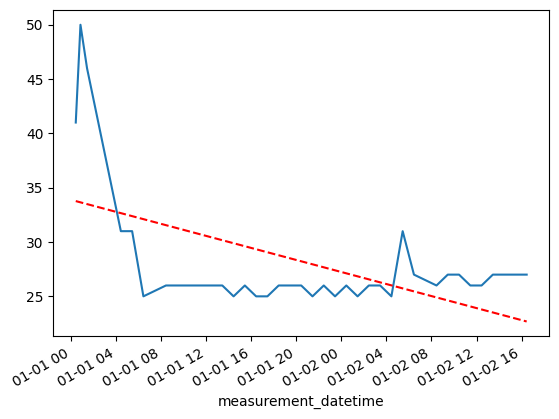

In [ ]:
import matplotlib.dates as dates

df_ret_O2conc = rslt_df[rslt_df['measurement_concept_id'] == 3025408]

df_ret_o2conc_index = df_ret_O2conc.set_index("measurement_datetime")
#df_ret_o2conc_index.head()

# Get values for the trend line analysis
x_dates = df_ret_o2conc_index.index
x_num = dates.date2num(x_dates)

y = df_ret_o2conc_index["value_as_number"]

# Calculate a fit line
trend = np.polyfit(x_num, df_ret_o2conc_index["value_as_number"], 1)
fit = np.poly1d(trend)

df_ret_o2conc_index["value_as_number"].plot()

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()
